In [41]:
Σ = [
    1 1 1 1 1 1 1 1 1 1;
    1 0 0 1 0 0 0 1 0 1;
    1 0 0 1 0 0 0 1 0 1;
    1 0 0 0 0 1 1 0 0 1;
    1 0 1 1 1 0 0 0 0 1;
    1 0 0 0 1 0 0 0 0 1;
    1 0 1 0 0 0 1 0 0 1;
    1 0 1 1 1 0 1 1 0 1;
    1 1 0 0 0 0 0 0 0 1;
    1 1 1 1 1 1 1 1 1 1;
];

In [34]:
Δ = [[-1, 0], [0, 1], [1, 0], [0, -1]]
ℬ(p,ϵ) = [p + δ*ϵ for δ ∈ Δ]

function route(α, β)
    Γ = [α]
    Γs = []
    function go()
        p = Γ[end]
        if p == β
            return true
        end
        for p ∈ ℬ(p,1)
            x, y = p
            if Σ[x,y] == 0 && p ∉ Γ
                Γ = [Γ;[p]]
                push!(Γs,Γ)
                if go()
                    return true
                end
                Γ = Γ[1:end-1]
            end
        end
        return false
    end 
    go()
    return Γ,Γs
end

route (generic function with 1 method)

In [29]:
function route2map(Γ)
    Σ₁ = deepcopy(Σ)
    for p ∈ Γ
        x,y = p
        Σ₁[x,y] = -1
    end
    return Σ₁
end

route2map (generic function with 1 method)

In [36]:
α = [2,2]
β = [9,9]
_,routes = route(α, β);

In [37]:
maps = map(route2map,routes);

In [32]:
using Plots
gr()

Plots.GRBackend()

┌ Info: Saved animation to 
│   fn = c:\Users\CreatorFan\Documents\Course\Data Structure\Stack\Maze\tmp.gif
└ @ Plots C:\Users\CreatorFan\.julia\packages\Plots\kyYZF\src\animation.jl:104


Plots.AnimatedGif("c:\\Users\\CreatorFan\\Documents\\Course\\Data Structure\\Stack\\Maze\\tmp.gif")
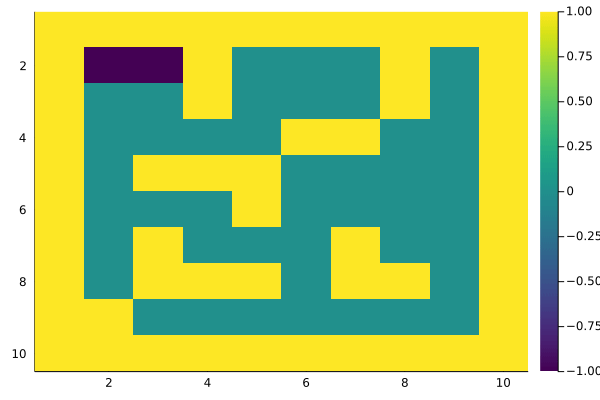

In [51]:
@gif for γ ∈ maps
    heatmap(γ,yflip = true,c = :viridiss)
end